# TP 1: Parcours des protons dans la matière

In [11]:
import numpy as np
import scipy as sp
#import graphinglib as gl
import matplotlib.pyplot as plt

from scipy.constants import N_A, c, m_e, m_p, e

In [12]:
# Définition de fonctions et classes utiles

def densite_electronique(matiere, rho):
    n_e = 0
    for x in matiere:
        n_e += x[0]*x[1]/x[2]
    return rho*n_e*N_A

def pouvoir_collisionnel(T, n_e, I, rho, massique = False):
    gamma = T/(mp*c**2)+1
    beta = ((gamma**2-1)/gamma**2)**0.5
    a = 2*me*c**2
    b = 1+(me/mp)**2
    delta = 2*me/mp
    Tmax = a*(gamma**2-1)/(b+delta*gamma)
    U = np.pi*r_e**2*a*n_e
    k = a/I**2
    S = (U/beta**2)*(np.log(k*beta**2*gamma**2*Tmax)-2*beta**2)
    if massique is True:
        S /= rho
    return S

## Questions:

### 1- Exprimez la densité électronique $n_e$ d’un milieu en fonction de sa composition atomique et de sa masse volumique $\rho$, et calculer $n_e$ pour l’eau (liquide) et l’os compact (définition de l’ICRU). On s’appuiera sur les données du NIST pour les compositions atomiques de ces matériaux.

La cellule suivante donne les numéros atomiques, la fraction massique et la masse molaire des éléments composant l'eau et l'os compact, de même que la masse volumique de ces deux substances. Elle fait ensuite appel à la fonction densite_elcetronique pour obtenir la densité électronique de l'eau et de l'os compact. La fonction densite_electronique reçoit en argument la composition chimique d'une matière et sa masse volumique en g/cm $^3$ et retourne sa densité électronique en électrons par cm $^3$.

In [13]:
# Numéros atomiques, composition atomique et masse molaire
eau = [(1, 0.111894, 1.008), (8, 0.888106, 15.999)]
os_compact = [(1, 0.063984, 1.008), (6, 0.278000, 12.011), (7, 0.027000, 14.007), (8, 0.410016, 15.999),
              (12, 0.002000, 24.305), (15, 0.070000, 30.974), (16, 0.002000, 32.06), (20, 0.147000, 40.078)]

# Masses volumiques en g/cm^3
rho_eau = 1.00000
rho_os_compact = 1.85000

# Densités électroniques en électrons/cm^3
n_eau = densite_electronique(eau, rho_eau)
n_os_compact = densite_electronique(os_compact, rho_os_compact)

### 2- Tracez les courbes du pouvoir d’arrêt collisionnel massique pour ces milieux en fonction de l’énergie cinétique ($T$). Pour expliciter la dépendance en $T$ de $S_{col}$, utilisez les relations 9 et 10 ci-bas. Pour le graphique, utilisez une échelle logarithmique en abscisse. Vous trouverez les énergies moyennes d’excitation $I$ de ces matériaux sur le site du NIST également.

La cellule suivante définit d'abord quelques constantes importantes, de même que les énergies moyennes d'excitation de l'eau liquide et de l'os compact. Elle fait ensuite appel à la fonction pouvoir_collisionnel pour tracer les courbes du pouvoir d'arrêt collisionnel massique. La fonction pouvoir_collisionnel reçoit en argument l'énergie cinétique du proton (MeV), la densité électronique du milieu (électrons/cm $^3$), l'énergie moyenne d'excitation du milieu (MeV) et la masse volumique du milieu (g/cm $^3$). Elle retourne le pouvoir d'arrêt collisionnel massique si massique is True, et le pouvoir d'arrêt collisionnel standard sinon.

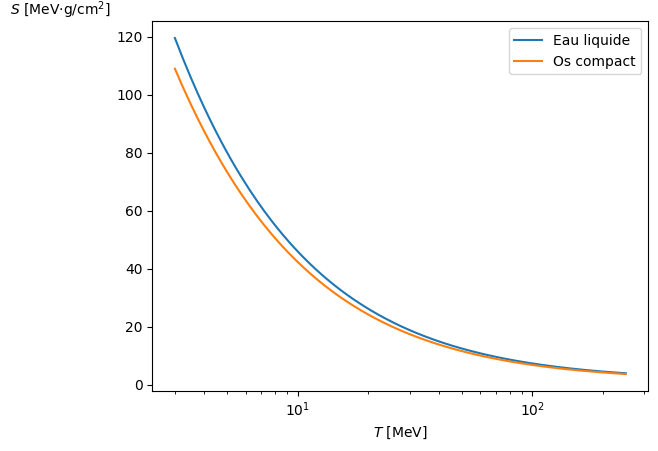

In [14]:
# Constantes importantes
mp = m_p/(10**6*e) # En MeV/c^2
me = m_e/(10**6*e) # En MeV/c^2
r_e = 10**2*sp.constants.value('classical electron radius') # En cm

# Énergies d'excitation en MeV
I_eau = 75.000000*10**(-6)
I_os_compact = 91.900000*10**(-6)

# Graphique
Tgraph = np.linspace(3, 250, 1000) # En MeV
plt.plot(Tgraph, pouvoir_collisionnel(Tgraph, n_eau, I_eau, rho_eau, massique = True), label = 'Eau liquide')
plt.plot(Tgraph, pouvoir_collisionnel(Tgraph, n_os_compact, I_os_compact, rho_os_compact, massique = True), label = 'Os compact')
plt.xlabel('$T$ [MeV]')
plt.ylabel('$S$ [MeV$\cdot$g/cm$^2$]', loc = 'top', rotation = 0)
plt.xscale('log')
plt.legend()
plt.show()

## Portée des protons dans la matière

L’approximation d’une décélération continue (*Continuous Slowing Down Approximation*, CSDA)
des protons dans la matière, en ligne droite, permet d’estimer leur portée dans le milieu
considéré (la distance qu’ils peuvent parcourir avant d’avoir transféré au milieu la totalité
de leur énergie cinétique initiale). Ici, seuls les transferts d’énergie vers les électrons du milieu
sont considérés.

### 3- En quoi la seule considération des interactions des protons avec les électrons du milieu est-elle justifiée ? Appuyez votre réponse en comparant les contributions des interactions nucléaires (protons avec noyaux atomiques du milieu) et radiatives (pertes d’énergie par *Bremsstrahlung*) au pouvoir d’arrêt total sur la plage 3-250 MeV. Les données PSTAR et un graphique pourraient être utiles.
La portée par CSDA ($R_{CSDA}$) est obtenue en intégrant l’inverse du pouvoir d’arrêt total par
rapport à l’énergie :
$$R_{CSDA} = \int_0^{T_i}\frac{dT'}{S_{col}},$$

### 4-  Pourquoi intègre-t-on l’inverse du pouvoir d’arrêt pour déterminer la portée ?

### 5- Justifiez la nécessité d’employer une méthode numérique pour calculer la portée des protons.

### 6- Implémenter deux algorithmes d’intégration numérique pour calculer la portée des protons dans l’eau et dans l’os compact ; le premier avec la méthode des trapèzes et le second avec la méthode de Romberg. Considérez des protons d’énergie initiale de 150 MeV à l’entrée du milieu. Estimez le nombre de tranches requises pour atteindre la précision machine avec chaque méthode, et discutez des conséquences sur le temps de calcul. Notez que comme l’expression 4 n’est valide que pour des protons ayant une énergie supérieure à 3 MeV, cette valeur sera utilisée comme borne d’intégration au lieu de 0. Le biais introduit dans les résultats par cette approximation ne vous sera pas reproché.

### 7- Tracez un graphique de la portée calculée par chaque méthode en fonction du nombre d’échantillons (de tranches) considéré. Le même graphique rapportera l’estimation pratique de l’erreur d’approximation pour les deux méthodes (avec une échelle différente en ordonnée). Votre graphique comprendra des points choisis de façon à bien représenter le comportement de vos algorithmes (des échelles logarithmiques pourraient être nécessaires). Doubler le nombre de tranches entre chaque évaluation pourrait s’avérer judicieux.
